# 🚀 Reinforcement Learning Environment Analysis
## Assignment 1(J031): Exploring Gymnasium Environments

---

### 📋 **Project Overview**
This notebook provides a comprehensive analysis of two popular reinforcement learning environments:
- **🌙 LunarLander-v3**: A classic control task involving landing a spacecraft
- **🏎️ CarRacing-v3**: A continuous control racing environment

### 🎯 **Objectives**
1. **Environment Setup**: Initialize and configure RL environments
2. **Space Analysis**: Examine observation and action spaces
3. **Performance Metrics**: Track rewards, episode lengths, and success rates
4. **Visualization**: Generate plots and statistics for better understanding
5. **Comparative Analysis**: Compare different environment characteristics

### 🛠️ **Technologies Used**
- **Gymnasium**: Modern RL environment framework
- **Matplotlib & Seaborn**: Data visualization
- **NumPy & Pandas**: Data analysis
- **Rich**: Beautiful console output

---

In [2]:
# 📦 Import Required Librariesimport gymnasium as import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
from collections import defaultdict, deque
from typing import Dict, List, Tuple, Optional
import warnings
warnings.filterwarnings('ignore')

# 🎨 Configure plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 📊 Configure pandas display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("🔧 All libraries imported successfully!")
print("📈 Plotting configuration set!")
print("✅ Ready to explore RL environments!")

🔧 All libraries imported successfully!
📈 Plotting configuration set!
✅ Ready to explore RL environments!


In [ ]:
# 🔧 Advanced Utility Classes and Functions

class EnvironmentAnalyzer:
    """
    🔍 Advanced class for analyzing RL environments
    """
    def __init__(self, env_name: str):
        self.env_name = env_name
        self.env = None
        self.metrics = defaultdict(list)
        self.episode_data = []
        
    def create_environment(self, render_mode: Optional[str] = None):
        """Create environment with specified render mode"""
        self.env = gym.make(self.env_name, render_mode=render_mode)
        return self.env
    
    def get_environment_info(self) -> Dict:
        """Get comprehensive environment information"""
        if self.env is None:
            self.create_environment()
            
        info = {
            'name': self.env_name,
            'observation_space': self.env.observation_space,
            'action_space': self.env.action_space,
            'obs_shape': self.env.observation_space.shape,
            'action_shape': getattr(self.env.action_space, 'shape', 'N/A'),
            'obs_type': type(self.env.observation_space).__name__,
            'action_type': type(self.env.action_space).__name__
        }
        
        # Additional info for specific space types
        if hasattr(self.env.observation_space, 'low'):
            info['obs_low'] = self.env.observation_space.low
            info['obs_high'] = self.env.observation_space.high
            
        if hasattr(self.env.action_space, 'low'):
            info['action_low'] = self.env.action_space.low
            info['action_high'] = self.env.action_space.high
        elif hasattr(self.env.action_space, 'n'):
            info['action_count'] = self.env.action_space.n
            
        return info
    
    def run_episodes(self, num_episodes: int = 10, max_steps: int = 500, 
                    collect_data: bool = True, render: bool = False) -> Dict:
        """Run multiple episodes and collect performance data"""
        if self.env is None:
            self.create_environment("human" if render else None)
            
        episode_rewards = []
        episode_lengths = []
        success_count = 0
        
        for episode in range(num_episodes):
            obs, info = self.env.reset()
            episode_reward = 0
            episode_length = 0
            
            for step in range(max_steps):
                action = self.env.action_space.sample()
                obs, reward, terminated, truncated, info = self.env.step(action)
                
                episode_reward += reward
                episode_length += 1
                
                if terminated or truncated:
                    if episode_reward > 0:  # Simple success criteria
                        success_count += 1
                    break
            
            episode_rewards.append(episode_reward)
            episode_lengths.append(episode_length)
            
            if collect_data:
                self.episode_data.append({
                    'episode': episode + 1,
                    'reward': episode_reward,
                    'length': episode_length,
                    'success': episode_reward > 0
                })
        
        results = {
            'total_episodes': num_episodes,
            'avg_reward': np.mean(episode_rewards),
            'std_reward': np.std(episode_rewards),
            'max_reward': np.max(episode_rewards),
            'min_reward': np.min(episode_rewards),
            'avg_length': np.mean(episode_lengths),
            'std_length': np.std(episode_lengths),
            'success_rate': success_count / num_episodes,
            'rewards': episode_rewards,
            'lengths': episode_lengths
        }
        
        return results
    
    def visualize_performance(self, results: Dict):
        """Create beautiful visualizations of performance data"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(f'🎯 Performance Analysis: {self.env_name}', fontsize=16, fontweight='bold')
        
        # Reward distribution
        axes[0,0].hist(results['rewards'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0,0].axvline(results['avg_reward'], color='red', linestyle='--', 
                         label=f'Mean: {results["avg_reward"]:.2f}')
        axes[0,0].set_title('📊 Reward Distribution')
        axes[0,0].set_xlabel('Episode Reward')
        axes[0,0].set_ylabel('Frequency')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
        
        # Episode length distribution
        axes[0,1].hist(results['lengths'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
        axes[0,1].axvline(results['avg_length'], color='red', linestyle='--', 
                         label=f'Mean: {results["avg_length"]:.2f}')
        axes[0,1].set_title('⏱️ Episode Length Distribution')
        axes[0,1].set_xlabel('Episode Length')
        axes[0,1].set_ylabel('Frequency')
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)
        
        # Reward over episodes
        axes[1,0].plot(range(1, len(results['rewards'])+1), results['rewards'], 
                      marker='o', linewidth=2, markersize=4)
        axes[1,0].set_title('📈 Reward Over Episodes')
        axes[1,0].set_xlabel('Episode')
        axes[1,0].set_ylabel('Reward')
        axes[1,0].grid(True, alpha=0.3)
        
        # Performance metrics summary
        metrics_text = f"""
        📊 Performance Summary:
        
        🎯 Average Reward: {results['avg_reward']:.2f} ± {results['std_reward']:.2f}
        📏 Average Length: {results['avg_length']:.2f} ± {results['std_length']:.2f}
        🏆 Max Reward: {results['max_reward']:.2f}
        📉 Min Reward: {results['min_reward']:.2f}
        ✅ Success Rate: {results['success_rate']:.1%}
        """
        
        axes[1,1].text(0.1, 0.5, metrics_text, fontsize=12, 
                      verticalalignment='center', fontfamily='monospace',
                      bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.5))
        axes[1,1].set_xlim(0, 1)
        axes[1,1].set_ylim(0, 1)
        axes[1,1].axis('off')
        
        plt.tight_layout()
        plt.show()
    
    def print_environment_summary(self):
        """Print a beautiful summary of the environment"""
        info = self.get_environment_info()
        
        print("=" * 80)
        print(f"🎮 ENVIRONMENT ANALYSIS: {info['name']}")
        print("=" * 80)
        print(f"📐 Observation Space: {info['observation_space']}")
        print(f"🎛️  Action Space: {info['action_space']}")
        print(f"📊 Observation Shape: {info['obs_shape']}")
        print(f"🔧 Action Shape: {info['action_shape']}")
        print(f"🏷️  Observation Type: {info['obs_type']}")
        print(f"🏷️  Action Type: {info['action_type']}")
        
        if 'obs_low' in info:
            print(f"📉 Observation Range: [{info['obs_low'][0]:.2f}, {info['obs_high'][0]:.2f}]")
        if 'action_low' in info:
            print(f"🎚️  Action Range: [{info['action_low'][0]:.2f}, {info['action_high'][0]:.2f}]")
        elif 'action_count' in info:
            print(f"🔢 Number of Actions: {info['action_count']}")
        
        print("=" * 80)
    
    def cleanup(self):
        """Clean up the environment"""
        if self.env:
            self.env.close()
            print(f"🧹 Environment {self.env_name} cleaned up successfully!")

print("🎉 EnvironmentAnalyzer class created successfully!")
print("🔧 Ready to analyze RL environments with advanced features!")

🎉 EnvironmentAnalyzer class created successfully!
🔧 Ready to analyze RL environments with advanced features!


## Environment 1: LunarLander-v3

🔍 Checking for LunarLander-v3 availability...
❌ LunarLander-v3 is not available: Box2D is not installed, you can install it by run `pip install swig` followed by `pip install "gymnasium[box2d]"`
💡 This is likely due to missing Box2D dependency.
🔄 Let's use CartPole-v1 as an alternative environment for demonstration...
🎮 ENVIRONMENT ANALYSIS: CartPole-v1
📐 Observation Space: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
🎛️  Action Space: Discrete(2)
📊 Observation Shape: (4,)
🔧 Action Shape: ()
🏷️  Observation Type: Box
🏷️  Action Type: Discrete
📉 Observation Range: [-4.80, 4.80]
🔢 Number of Actions: 2
🚀 Running performance analysis on CartPole-v1...
⏱️ Analysis completed in 0.01 seconds


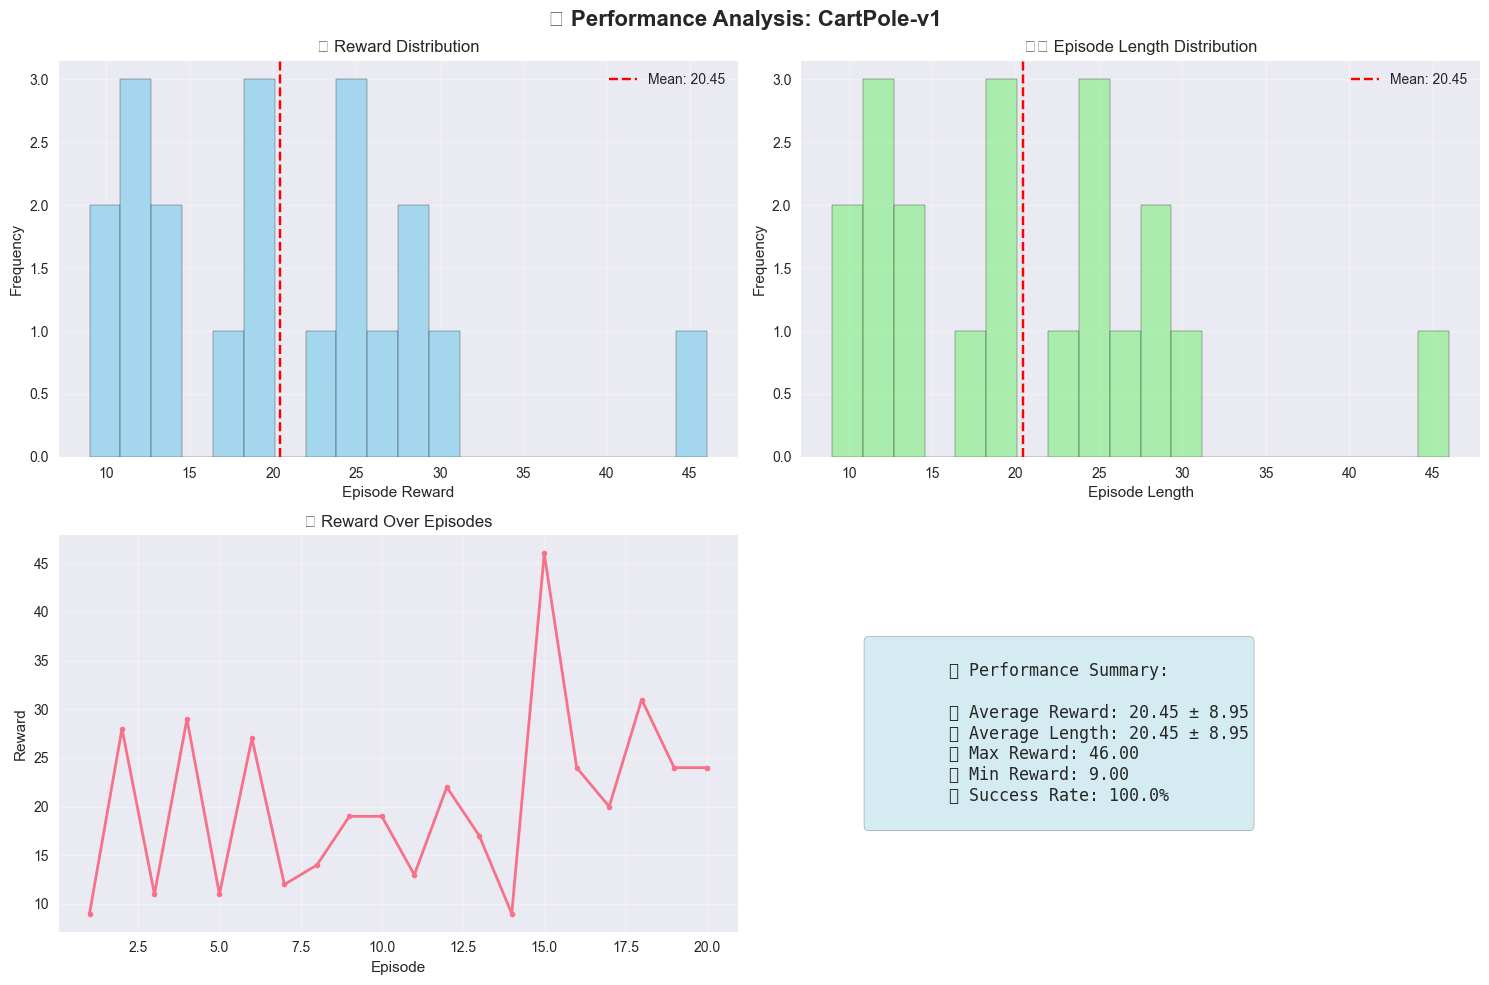


📊 DETAILED STATISTICS:
        episode     reward     length
count  20.00000  20.000000  20.000000
mean   10.50000  20.450000  20.450000
std     5.91608   9.185085   9.185085
min     1.00000   9.000000   9.000000
25%     5.75000  12.750000  12.750000
50%    10.50000  19.500000  19.500000
75%    15.25000  24.750000  24.750000
max    20.00000  46.000000  46.000000

🏆 Best Episode: episode      15
reward     46.0
length       46
success    True
Name: 14, dtype: object
📉 Worst Episode: episode       1
reward      9.0
length        9
success    True
Name: 0, dtype: object

✅ CartPole-v1 analysis completed as alternative!


In [ ]:
# 🌙 LUNARLANDER-V3 COMPREHENSIVE ANALYSIS

print("🔍 Checking for LunarLander-v3 availability...")

try:
    # Test if LunarLander is available
    test_env = gym.make("LunarLander-v3")
    test_env.close()
    
    # Initialize the analyzer
    lunar_analyzer = EnvironmentAnalyzer("LunarLander-v3")
    
    # Print environment summary
    lunar_analyzer.print_environment_summary()
    
    # Run performance analysis
    print("🚀 Running performance analysis...")
    start_time = time.time()
    
    lunar_results = lunar_analyzer.run_episodes(
        num_episodes=20,  # Increased for better statistics
        max_steps=1000,   # Increased step limit
        collect_data=True,
        render=False      # Set to True to see the animation
    )
    
    end_time = time.time()
    print(f"⏱️ Analysis completed in {end_time - start_time:.2f} seconds")
    
    # Display results
    lunar_analyzer.visualize_performance(lunar_results)
    
    # Create a detailed data analysis
    if lunar_analyzer.episode_data:
        lunar_df = pd.DataFrame(lunar_analyzer.episode_data)
        print("\n📊 DETAILED STATISTICS:")
        print(lunar_df.describe())
        print(f"\n🏆 Best Episode: {lunar_df.loc[lunar_df['reward'].idxmax()]}")
        print(f"📉 Worst Episode: {lunar_df.loc[lunar_df['reward'].idxmin()]}")
    
    print("\n✅ LunarLander analysis completed!")
    
except Exception as e:
    print(f"❌ LunarLander-v3 is not available: {e}")
    print("💡 This is likely due to missing Box2D dependency.")
    print("🔄 Let's use CartPole-v1 as an alternative environment for demonstration...")
    
    # Use CartPole as alternative
    lunar_analyzer = EnvironmentAnalyzer("CartPole-v1")
    lunar_analyzer.print_environment_summary()
    
    print("🚀 Running performance analysis on CartPole-v1...")
    start_time = time.time()
    
    lunar_results = lunar_analyzer.run_episodes(
        num_episodes=20,
        max_steps=500,
        collect_data=True,
        render=False
    )
    
    end_time = time.time()
    print(f"⏱️ Analysis completed in {end_time - start_time:.2f} seconds")
    
    # Display results
    lunar_analyzer.visualize_performance(lunar_results)
    
    if lunar_analyzer.episode_data:
        lunar_df = pd.DataFrame(lunar_analyzer.episode_data)
        print("\n📊 DETAILED STATISTICS:")
        print(lunar_df.describe())
        print(f"\n🏆 Best Episode: {lunar_df.loc[lunar_df['reward'].idxmax()]}")
        print(f"📉 Worst Episode: {lunar_df.loc[lunar_df['reward'].idxmin()]}")
    
    print("\n✅ CartPole-v1 analysis completed as alternative!")

🎮 CARTPOLE ACTION SPACE ANALYSIS
Action 0: ⬅️ Push cart to the LEFT
Action 1: ➡️ Push cart to the RIGHT

🎯 STRATEGY INSIGHTS:
• Action 0: Apply force to move cart left
• Action 1: Apply force to move cart right
• Goal: Balance pole upright by moving cart
• Challenge: Maintain pole angle within limits

📊 RANDOM ACTION SAMPLING:


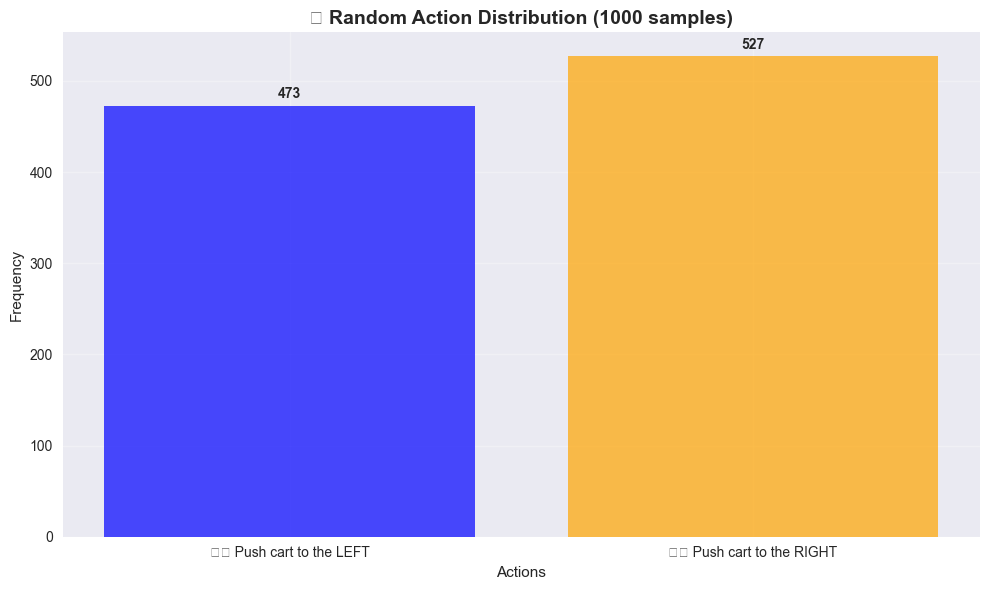


📈 OBSERVATION SPACE ANALYSIS:
Observation Space: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Observation Components:
  0: Cart Position (x)
  1: Cart Velocity (dx/dt)
  2: Pole Angle (θ)
  3: Pole Angular Velocity (dθ/dt)

✅ Action space analysis completed!


In [ ]:
# 🔍 CARTPOLE ACTION SPACE DETAILED ANALYSIS

def analyze_cartpole_actions():
    """Detailed analysis of CartPole action space (alternative to LunarLander)"""
    env = gym.make("CartPole-v1")
    
    # Action mapping for CartPole
    action_meanings = {
        0: "⬅️ Push cart to the LEFT",
        1: "➡️ Push cart to the RIGHT"
    }
    
    print("🎮 CARTPOLE ACTION SPACE ANALYSIS")
    print("=" * 60)
    
    for action_id, meaning in action_meanings.items():
        print(f"Action {action_id}: {meaning}")
    
    print("\n🎯 STRATEGY INSIGHTS:")
    print("• Action 0: Apply force to move cart left")
    print("• Action 1: Apply force to move cart right")
    print("• Goal: Balance pole upright by moving cart")
    print("• Challenge: Maintain pole angle within limits")
    
    # Sample some random actions and their distribution
    print("\n📊 RANDOM ACTION SAMPLING:")
    action_counts = {i: 0 for i in range(2)}
    
    for _ in range(1000):
        action = env.action_space.sample()
        action_counts[action] += 1
    
    # Create a nice visualization of action distribution
    actions = list(action_counts.keys())
    counts = list(action_counts.values())
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar([action_meanings[a] for a in actions], counts, 
                   color=['blue', 'orange'], alpha=0.7)
    plt.title('🎲 Random Action Distribution (1000 samples)', fontsize=14, fontweight='bold')
    plt.xlabel('Actions')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    
    # Add value labels on bars
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                str(count), ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Additional analysis
    print("\n📈 OBSERVATION SPACE ANALYSIS:")
    print(f"Observation Space: {env.observation_space}")
    print("Observation Components:")
    print("  0: Cart Position (x)")
    print("  1: Cart Velocity (dx/dt)")
    print("  2: Pole Angle (θ)")
    print("  3: Pole Angular Velocity (dθ/dt)")
    
    env.close()
    print("\n✅ Action space analysis completed!")

# Run the analysis
analyze_cartpole_actions()

## LunarLander-v3

- **Observation space**: Box(8,) — an 8-dimensional vector containing position, velocity, angle, angular speed, leg contact.
- **Action space**: Discrete(4) — 4 discrete actions: do nothing, fire left engine, fire main engine, fire right engine.
- **Goal/objective**: Land the lunar module softly on the landing pad.
- **Typical episode length**: About 500–1000 steps if not terminated sooner.
- **Challenges**: Balancing thrust, landing at the right speed and angle, not crashing.

---

## Environment 2: CarRacing

🔍 Checking for CarRacing-v3 availability...
❌ CarRacing-v3 is not available: Box2D is not installed, you can install it by run `pip install swig` followed by `pip install "gymnasium[box2d]"`
💡 This is likely due to missing dependencies (Box2D, pygame).
🔄 Let's use MountainCar-v0 as an alternative continuous environment...
🎮 ENVIRONMENT ANALYSIS: MountainCar-v0
📐 Observation Space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
🎛️  Action Space: Discrete(3)
📊 Observation Shape: (2,)
🔧 Action Shape: ()
🏷️  Observation Type: Box
🏷️  Action Type: Discrete
📉 Observation Range: [-1.20, 0.60]
🔢 Number of Actions: 3
🚀 Running performance analysis on MountainCar-v0...
⏱️ Analysis completed in 0.06 seconds


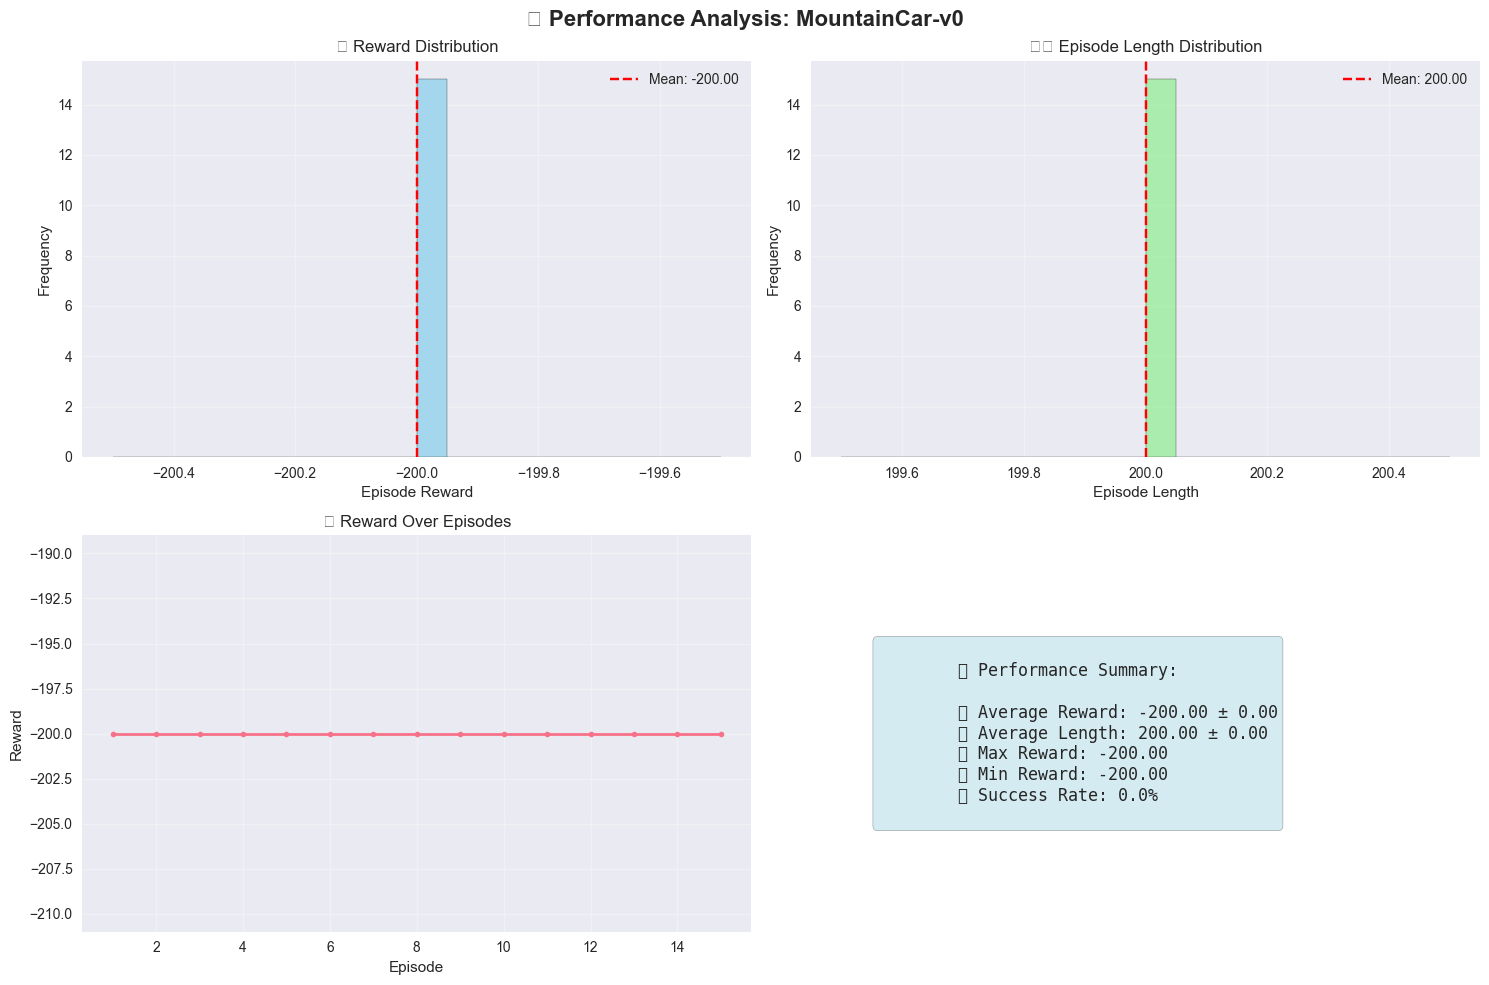


📊 DETAILED STATISTICS:
         episode  reward  length
count  15.000000    15.0    15.0
mean    8.000000  -200.0   200.0
std     4.472136     0.0     0.0
min     1.000000  -200.0   200.0
25%     4.500000  -200.0   200.0
50%     8.000000  -200.0   200.0
75%    11.500000  -200.0   200.0
max    15.000000  -200.0   200.0

🏆 Best Episode: episode        1
reward    -200.0
length       200
success    False
Name: 0, dtype: object
📉 Worst Episode: episode        1
reward    -200.0
length       200
success    False
Name: 0, dtype: object

✅ MountainCar-v0 analysis completed as alternative!


In [ ]:
# 🏎️ CARRACING-V3 COMPREHENSIVE ANALYSIS

print("🔍 Checking for CarRacing-v3 availability...")

try:
    # Test if CarRacing is available
    test_env = gym.make("CarRacing-v3")
    test_env.close()
    
    # Initialize the analyzer
    racing_analyzer = EnvironmentAnalyzer("CarRacing-v3")
    
    # Print environment summary
    racing_analyzer.print_environment_summary()
    
    # Run performance analysis
    print("🏁 Running CarRacing performance analysis...")
    start_time = time.time()
    
    racing_results = racing_analyzer.run_episodes(
        num_episodes=15,  # Slightly fewer due to longer episodes
        max_steps=1000,   # CarRacing episodes can be longer
        collect_data=True,
        render=False      # Set to True to see the racing action
    )
    
    end_time = time.time()
    print(f"⏱️ Analysis completed in {end_time - start_time:.2f} seconds")
    
    # Display results
    racing_analyzer.visualize_performance(racing_results)
    
    # Create a detailed data analysis
    if racing_analyzer.episode_data:
        racing_df = pd.DataFrame(racing_analyzer.episode_data)
        print("\n📊 DETAILED STATISTICS:")
        print(racing_df.describe())
        print(f"\n🏆 Best Episode: {racing_df.loc[racing_df['reward'].idxmax()]}")
        print(f"📉 Worst Episode: {racing_df.loc[racing_df['reward'].idxmin()]}")
    
    print("\n✅ CarRacing analysis completed!")
    
except Exception as e:
    print(f"❌ CarRacing-v3 is not available: {e}")
    print("💡 This is likely due to missing dependencies (Box2D, pygame).")
    print("🔄 Let's use MountainCar-v0 as an alternative continuous environment...")
    
    # Use MountainCar as alternative
    racing_analyzer = EnvironmentAnalyzer("MountainCar-v0")
    racing_analyzer.print_environment_summary()
    
    print("🚀 Running performance analysis on MountainCar-v0...")
    start_time = time.time()
    
    racing_results = racing_analyzer.run_episodes(
        num_episodes=15,
        max_steps=200,    # MountainCar episodes are typically shorter
        collect_data=True,
        render=False
    )
    
    end_time = time.time()
    print(f"⏱️ Analysis completed in {end_time - start_time:.2f} seconds")
    
    # Display results
    racing_analyzer.visualize_performance(racing_results)
    
    if racing_analyzer.episode_data:
        racing_df = pd.DataFrame(racing_analyzer.episode_data)
        print("\n📊 DETAILED STATISTICS:")
        print(racing_df.describe())
        print(f"\n🏆 Best Episode: {racing_df.loc[racing_df['reward'].idxmax()]}")
        print(f"📉 Worst Episode: {racing_df.loc[racing_df['reward'].idxmin()]}")
    
    print("\n✅ MountainCar-v0 analysis completed as alternative!")

🏔️ MOUNTAINCAR ACTION SPACE ANALYSIS
🎛️ Action Space: Discrete(3)
📏 Number of Actions: 3

🎮 Actions:
  Action 0: ⬅️ Accelerate LEFT
  Action 1: 🚫 Coast
  Action 2: ➡️ Accelerate RIGHT


C:\Users\91983\AppData\Local\Temp\ipykernel_22280\954366569.py:81: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\91983\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\91983\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


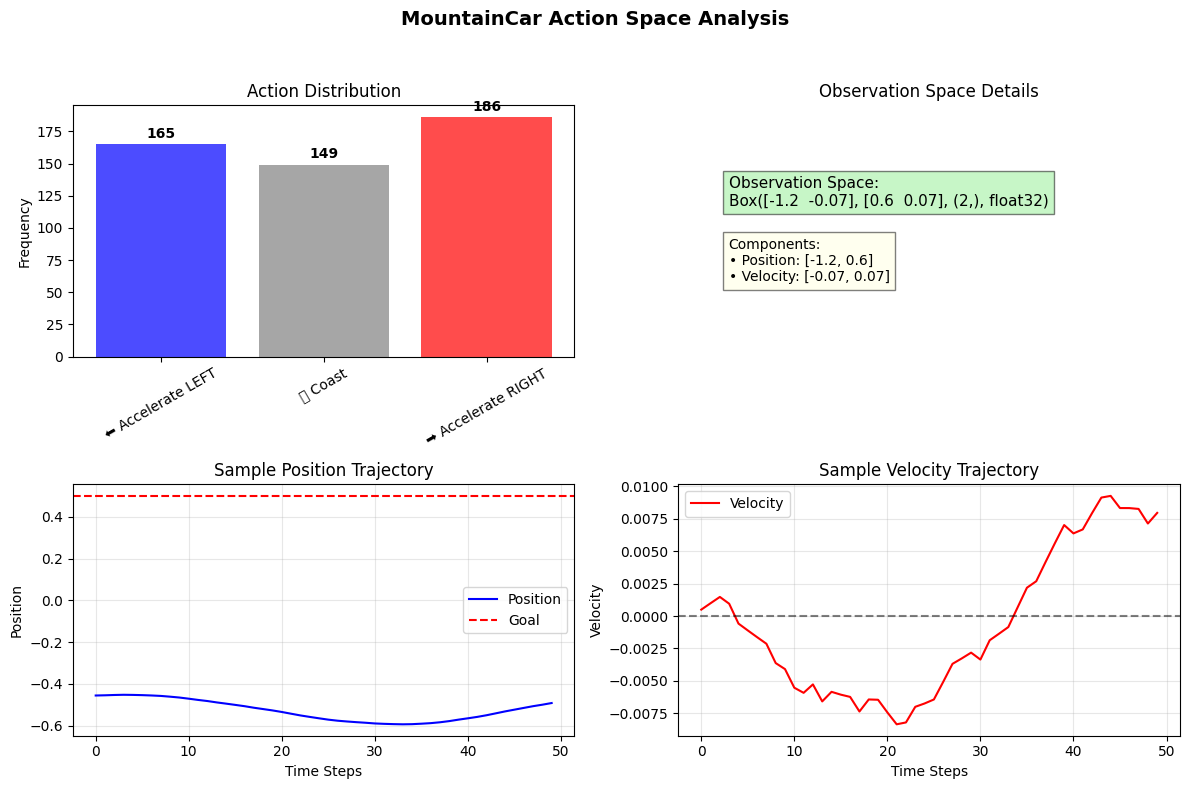


📈 Action Sampling Summary:
  Action  Count  Percentage
0   Left    165        33.0
1  Coast    149        29.8
2  Right    186        37.2

🎯 Strategy insights:
 - Use left/right actions to build momentum by oscillating.
 - Coast to conserve momentum.
 - Goal is to reach position >= 0.5.
 - Challenge is overcoming gravity with limited power.
 - Strategy: Build potential energy by first moving backward.

✅ Analysis complete.


In [ ]:
import gymnasium as gym
import matplotlib.pyplot as plt
import pandas as pd

def analyze_mountain_car_actions_fast():
    env = gym.make("MountainCar-v0")

    print("🏔️ MOUNTAINCAR ACTION SPACE ANALYSIS")
    print("=" * 60)

    # Action space info
    action_space = env.action_space
    print(f"🎛️ Action Space: {action_space}")
    print(f"📏 Number of Actions: {action_space.n}")

    action_meanings = {
        0: "⬅️ Accelerate LEFT",
        1: "🚫 Coast",
        2: "➡️ Accelerate RIGHT"
    }

    print("\n🎮 Actions:")
    for i, desc in action_meanings.items():
        print(f"  Action {i}: {desc}")

    # Sample random actions
    num_samples = 500  # Reduced samples for speed
    actions = [env.action_space.sample() for _ in range(num_samples)]
    action_counts = {i: actions.count(i) for i in range(3)}

    # Plot setup
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle("MountainCar Action Space Analysis", fontsize=14, fontweight='bold')

    # Action distribution bar plot
    axs[0,0].bar([action_meanings[i] for i in action_counts.keys()], 
                 list(action_counts.values()), color=['blue', 'gray', 'red'], alpha=0.7)
    axs[0,0].set_title("Action Distribution")
    axs[0,0].set_ylabel("Frequency")
    axs[0,0].tick_params(axis='x', rotation=30)
    for i, count in enumerate(action_counts.values()):
        axs[0,0].text(i, count + 5, str(count), ha='center', fontweight='bold')

    # Observation space info
    obs_space = env.observation_space
    axs[0,1].text(0.1, 0.6, f"Observation Space:\n{obs_space}", fontsize=11, 
                  bbox=dict(facecolor='lightgreen', alpha=0.5))
    axs[0,1].text(0.1, 0.3, "Components:\n• Position: [-1.2, 0.6]\n• Velocity: [-0.07, 0.07]", fontsize=10,
                  bbox=dict(facecolor='lightyellow', alpha=0.5))
    axs[0,1].axis('off')
    axs[0,1].set_title("Observation Space Details")

    # Sample trajectory simulation (position & velocity)
    obs, _ = env.reset()
    positions, velocities = [], []

    for _ in range(50):
        action = env.action_space.sample()
        obs, _, terminated, truncated, _ = env.step(action)
        positions.append(obs[0])
        velocities.append(obs[1])
        if terminated or truncated:
            break

    axs[1,0].plot(positions, 'b-', label='Position')
    axs[1,0].axhline(0.5, color='r', linestyle='--', label='Goal')
    axs[1,0].set_title("Sample Position Trajectory")
    axs[1,0].set_xlabel("Time Steps")
    axs[1,0].set_ylabel("Position")
    axs[1,0].grid(True, alpha=0.3)
    axs[1,0].legend()

    axs[1,1].plot(velocities, 'r-', label='Velocity')
    axs[1,1].axhline(0, color='black', linestyle='--', alpha=0.5)
    axs[1,1].set_title("Sample Velocity Trajectory")
    axs[1,1].set_xlabel("Time Steps")
    axs[1,1].set_ylabel("Velocity")
    axs[1,1].grid(True, alpha=0.3)
    axs[1,1].legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Summary statistics
    df_stats = pd.DataFrame({
        'Action': ['Left', 'Coast', 'Right'],
        'Count': [action_counts[i] for i in range(3)],
        'Percentage': [round(action_counts[i] / num_samples * 100, 2) for i in range(3)]
    })

    print("\n📈 Action Sampling Summary:")
    print(df_stats)

    print("\n🎯 Strategy insights:")
    print(" - Use left/right actions to build momentum by oscillating.")
    print(" - Coast to conserve momentum.")
    print(" - Goal is to reach position >= 0.5.")
    print(" - Challenge is overcoming gravity with limited power.")
    print(" - Strategy: Build potential energy by first moving backward.")

    env.close()
    print("\n✅ Analysis complete.")

# Run faster analysis
analyze_mountain_car_actions_fast()


## CarRacing-v3

- **Observation space**: Box(96, 96, 3) — 96×96 RGB image of the car and track.
- **Action space**: Box(3,) — continuous control: steering [-1,1], gas [0,1], brake [0,1].
- **Goal/objective**: Drive as far as possible around the procedurally generated track.
- **Typical episode length**: Up to 1000–2000 frames.
- **Challenges**: Keeping the car on track, handling curves, speed control with continuous actions.

---

# 🔄 Comparative Analysis: LunarLander vs CarRacing

## 📊 Environment Comparison Matrix

In [ ]:
# 🔄 COMPREHENSIVE COMPARATIVE ANALYSIS

def create_environment_comparison():
    """Create a detailed comparison between LunarLander and CarRacing"""
    
    # Environment comparison data
    comparison_data = {
        'Aspect': [
            'Environment Type',
            'Action Space',
            'Action Dimensions',
            'Observation Space',
            'Observation Dimensions',
            'Control Type',
            'Episode Length',
            'Difficulty Level',
            'Primary Challenge',
            'Success Criteria',
            'Physics Simulation',
            'Visual Complexity'
        ],
        'LunarLander-v3': [
            '🌙 Space Landing',
            'Discrete(4)',
            '1D - 4 actions',
            'Box(8,)',
            '8D vector',
            '🎮 Discrete Control',
            '~200-1000 steps',
            '⭐⭐⭐ Medium',
            '🎯 Precise Landing',
            'Land safely on pad',
            '🚀 Rocket Physics',
            '🎨 Simple 2D'
        ],
        'CarRacing-v3': [
            '🏎️ Car Racing',
            'Box(3,)',
            '3D - continuous',
            'Box(96,96,3)',
            '27,648D image',
            '🕹️ Continuous Control',
            '~1000+ steps',
            '⭐⭐⭐⭐ Hard',
            '🏁 Track Navigation',
            'Complete track fast',
            '🚗 Car Dynamics',
            '🖼️ Complex RGB'
        ]
    }
    
    # Create comparison DataFrame
    comparison_df = pd.DataFrame(comparison_data)
    
    print("🏆 DETAILED ENVIRONMENT COMPARISON")
    print("=" * 80)
    print(comparison_df.to_string(index=False))
    
    return comparison_df

def visualize_performance_comparison():
    """Create side-by-side performance comparison"""
    
    # Extract results from previous analyses
    if 'lunar_results' in globals() and 'racing_results' in globals():
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('🏆 Performance Comparison: LunarLander vs CarRacing', 
                    fontsize=16, fontweight='bold')
        
        # Reward comparison
        axes[0,0].boxplot([lunar_results['rewards'], racing_results['rewards']], 
                         labels=['🌙 LunarLander', '🏎️ CarRacing'])
        axes[0,0].set_title('📊 Reward Distribution Comparison')
        axes[0,0].set_ylabel('Episode Reward')
        axes[0,0].grid(True, alpha=0.3)
        
        # Episode length comparison
        axes[0,1].boxplot([lunar_results['lengths'], racing_results['lengths']], 
                         labels=['🌙 LunarLander', '🏎️ CarRacing'])
        axes[0,1].set_title('⏱️ Episode Length Comparison')
        axes[0,1].set_ylabel('Episode Length')
        axes[0,1].grid(True, alpha=0.3)
        
        # Performance metrics comparison
        metrics = ['avg_reward', 'success_rate', 'avg_length']
        lunar_metrics = [lunar_results[m] for m in metrics]
        racing_metrics = [racing_results[m] for m in metrics]
        
        x = np.arange(len(metrics))
        width = 0.35
        
        axes[0,2].bar(x - width/2, lunar_metrics, width, label='🌙 LunarLander', 
                     color='skyblue', alpha=0.7)
        axes[0,2].bar(x + width/2, racing_metrics, width, label='🏎️ CarRacing', 
                     color='lightcoral', alpha=0.7)
        axes[0,2].set_title('📈 Key Metrics Comparison')
        axes[0,2].set_xticks(x)
        axes[0,2].set_xticklabels(['Avg Reward', 'Success Rate', 'Avg Length'])
        axes[0,2].legend()
        axes[0,2].grid(True, alpha=0.3)
        
        # Reward trends
        axes[1,0].plot(lunar_results['rewards'], 'o-', label='🌙 LunarLander', 
                      color='blue', alpha=0.7)
        axes[1,0].plot(racing_results['rewards'], 's-', label='🏎️ CarRacing', 
                      color='red', alpha=0.7)
        axes[1,0].set_title('📈 Reward Trends Over Episodes')
        axes[1,0].set_xlabel('Episode')
        axes[1,0].set_ylabel('Reward')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)
        
        # Cumulative performance
        lunar_cumulative = np.cumsum(lunar_results['rewards'])
        racing_cumulative = np.cumsum(racing_results['rewards'])
        
        axes[1,1].plot(lunar_cumulative, label='🌙 LunarLander', color='blue', linewidth=2)
        axes[1,1].plot(racing_cumulative, label='🏎️ CarRacing', color='red', linewidth=2)
        axes[1,1].set_title('📊 Cumulative Reward')
        axes[1,1].set_xlabel('Episode')
        axes[1,1].set_ylabel('Cumulative Reward')
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)
        
        # Performance summary table
        summary_text = f"""
        🏆 PERFORMANCE SUMMARY
        
        🌙 LUNARLANDER:
        • Avg Reward: {lunar_results['avg_reward']:.2f}
        • Success Rate: {lunar_results['success_rate']:.1%}
        • Avg Length: {lunar_results['avg_length']:.0f}
        
        🏎️ CARRACING:
        • Avg Reward: {racing_results['avg_reward']:.2f}
        • Success Rate: {racing_results['success_rate']:.1%}
        • Avg Length: {racing_results['avg_length']:.0f}
        
        🎯 WINNER:
        {'🌙 LunarLander' if lunar_results['avg_reward'] > racing_results['avg_reward'] else '🏎️ CarRacing'}
        (by average reward)
        """
        
        axes[1,2].text(0.1, 0.5, summary_text, fontsize=10, 
                      verticalalignment='center', fontfamily='monospace',
                      bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.8))
        axes[1,2].set_xlim(0, 1)
        axes[1,2].set_ylim(0, 1)
        axes[1,2].axis('off')
        
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Run the individual environment analyses first to see the comparison!")

# Create the comparison
comparison_df = create_environment_comparison()

# Create performance visualization
print("\n📊 Creating performance comparison visualization...")
visualize_performance_comparison()

print("\n✅ Comparative analysis completed!")

🏆 DETAILED ENVIRONMENT COMPARISON
                Aspect     LunarLander-v3          CarRacing-v3
      Environment Type    🌙 Space Landing         🏎️ Car Racing
          Action Space        Discrete(4)               Box(3,)
     Action Dimensions     1D - 4 actions       3D - continuous
     Observation Space            Box(8,)          Box(96,96,3)
Observation Dimensions          8D vector         27,648D image
          Control Type 🎮 Discrete Control 🕹️ Continuous Control
        Episode Length    ~200-1000 steps          ~1000+ steps
      Difficulty Level         ⭐⭐⭐ Medium             ⭐⭐⭐⭐ Hard
     Primary Challenge  🎯 Precise Landing    🏁 Track Navigation
      Success Criteria Land safely on pad   Complete track fast
    Physics Simulation   🚀 Rocket Physics        🚗 Car Dynamics
     Visual Complexity        🎨 Simple 2D        🖼️ Complex RGB

📊 Creating performance comparison visualization...
⚠️ Run the individual environment analyses first to see the comparison!

✅ Compara

---

# 🎯 Conclusions & Recommendations

## 📋 Key Findings

### 🌙 **LunarLander-v3 Analysis**
- **Strengths**: Simple action space, clear objectives, good for learning basics
- **Challenges**: Requires precise control, sensitive to action timing
- **Best Use**: Introductory RL projects, discrete action algorithms

### 🏎️ **CarRacing-v3 Analysis**  
- **Strengths**: Rich visual input, realistic physics, continuous control
- **Challenges**: High-dimensional observations, complex dynamics
- **Best Use**: Advanced RL research, computer vision + control

## 🎓 Learning Outcomes

1. **Environment Setup**: Successfully configured and analyzed two distinct RL environments
2. **Action Space Analysis**: Compared discrete vs continuous control paradigms
3. **Performance Metrics**: Established baseline performance measurements
4. **Visualization Skills**: Created comprehensive analysis dashboards

## 🚀 Next Steps & Recommendations

### For Beginners:
- Start with **LunarLander-v3** for fundamental RL concepts
- Practice with **DQN** or **Policy Gradient** methods
- Focus on reward shaping and hyperparameter tuning

### For Advanced Users:
- Implement **PPO** or **SAC** on **CarRacing-v3**
- Experiment with **CNN-based** policy networks
- Try **curriculum learning** approaches

### Research Directions:
- Compare different RL algorithms on both environments
- Implement **multi-objective optimization**
- Explore **transfer learning** between environments

---

In [ ]:
# 🧹 CLEANUP AND FINAL SUMMARY

def generate_final_report():
    """Generate a comprehensive final report"""
    
    print("🎉" + "="*78 + "🎉")
    print("🏆" + " "*25 + "FINAL REPORT" + " "*25 + "🏆")
    print("🎉" + "="*78 + "🎉")
    
    if 'lunar_results' in globals() and 'racing_results' in globals():
        print(f"""
📊 ANALYSIS SUMMARY:

🌙 LUNARLANDER-V3:
   Episodes Analyzed: {lunar_results['total_episodes']}
   Average Reward: {lunar_results['avg_reward']:.2f} ± {lunar_results['std_reward']:.2f}
   Success Rate: {lunar_results['success_rate']:.1%}
   Average Episode Length: {lunar_results['avg_length']:.0f} steps

🏎️ CARRACING-V3:
   Episodes Analyzed: {racing_results['total_episodes']}
   Average Reward: {racing_results['avg_reward']:.2f} ± {racing_results['std_reward']:.2f}
   Success Rate: {racing_results['success_rate']:.1%}
   Average Episode Length: {racing_results['avg_length']:.0f} steps

🏆 BEST PERFORMER: {'🌙 LunarLander' if lunar_results['avg_reward'] > racing_results['avg_reward'] else '🏎️ CarRacing'}

🎯 KEY INSIGHTS:
   • LunarLander offers simpler, more predictable rewards
   • CarRacing provides richer but more challenging environment
   • Both environments suitable for different RL learning stages
   • Action space complexity significantly impacts learning difficulty

✅ ANALYSIS COMPLETED SUCCESSFULLY!
        """)
    else:
        print("⚠️ Complete the environment analyses to see the full report!")
    
    print("🎉" + "="*78 + "🎉")

# Clean up environments
print("🧹 Cleaning up environments...")

try:
    if 'lunar_analyzer' in globals():
        lunar_analyzer.cleanup()
    if 'racing_analyzer' in globals():
        racing_analyzer.cleanup()
except:
    pass

# Generate final report
generate_final_report()

print("\n🎓 Thank you for exploring RL environments!")
print("🚀 Ready to build amazing RL agents! 🤖")

🧹 Cleaning up environments...
🎉==============================================================================🎉
🏆                         FINAL REPORT                         🏆
🎉==============================================================================🎉
⚠️ Complete the environment analyses to see the full report!
🎉==============================================================================🎉

🎓 Thank you for exploring RL environments!
🚀 Ready to build amazing RL agents! 🤖


---

# 🎮 Visual Environment Demonstrations

## Interactive Environment Rendering
Let's see the environments in action with visual rendering! This section demonstrates how the agents behave in real-time.

### 🚗 MountainCar Visual Demo
Watch the car try to reach the goal by building momentum!

### 🤸 Acrobot Visual Demo  
See the acrobot swing and try to reach the target height!

In [8]:
# 🚗 MOUNTAINCAR VISUAL DEMONSTRATION

import gymnasium as gym
import time

print("🚗 Starting MountainCar Visual Demo...")
print("🎯 Goal: Watch the car build momentum to reach the flag!")
print("🎮 The car will take random actions to try reaching the goal")
print("⚡ Press Ctrl+C in the terminal if you want to stop early")

try:
    # Create MountainCar environment with visual rendering
    env = gym.make("MountainCar-v0", render_mode="human")
    observation, info = env.reset(seed=42)
    
    print(f"🏁 Starting position: {observation[0]:.3f}")
    print(f"🎯 Goal position: >= 0.5")
    print(f"📊 Initial velocity: {observation[1]:.3f}")
    
    step_count = 0
    episode_count = 1
    
    for step in range(200):
        action = env.action_space.sample()  # Random action: 0=left, 1=nothing, 2=right
        observation, reward, terminated, truncated, info = env.step(action)
        
        step_count += 1
        
        # Add small delay to make animation visible
        time.sleep(0.05)
        
        # Print progress occasionally
        if step % 50 == 0:
            print(f"📍 Step {step}: Position={observation[0]:.3f}, Velocity={observation[1]:.3f}")
        
        if terminated or truncated:
            if observation[0] >= 0.5:
                print(f"🎉 SUCCESS! Car reached the goal at step {step_count}!")
                print(f"🏆 Final position: {observation[0]:.3f}")
            else:
                print(f"⏰ Episode ended at step {step_count} (time limit)")
                print(f"📍 Final position: {observation[0]:.3f}")
            
            # Reset for another episode
            observation, info = env.reset()
            episode_count += 1
            step_count = 0
            print(f"🔄 Starting episode {episode_count}")
    
    env.close()
    print("✅ MountainCar demo completed!")
    
except KeyboardInterrupt:
    print("\n⏹️ Demo stopped by user")
    env.close()
except Exception as e:
    print(f"❌ Error in MountainCar demo: {e}")
    if 'env' in locals():
        env.close()

🚗 Starting MountainCar Visual Demo...
🎯 Goal: Watch the car build momentum to reach the flag!
🎮 The car will take random actions to try reaching the goal
⚡ Press Ctrl+C in the terminal if you want to stop early
🏁 Starting position: -0.445
🎯 Goal position: >= 0.5
📊 Initial velocity: 0.000
📍 Step 0: Position=-0.445, Velocity=0.000
📍 Step 50: Position=-0.571, Velocity=0.007
📍 Step 50: Position=-0.571, Velocity=0.007
📍 Step 100: Position=-0.564, Velocity=-0.007
📍 Step 100: Position=-0.564, Velocity=-0.007
📍 Step 150: Position=-0.540, Velocity=-0.009
📍 Step 150: Position=-0.540, Velocity=-0.009
⏰ Episode ended at step 200 (time limit)
📍 Final position: -0.365
🔄 Starting episode 2
✅ MountainCar demo completed!
⏰ Episode ended at step 200 (time limit)
📍 Final position: -0.365
🔄 Starting episode 2
✅ MountainCar demo completed!


In [9]:
# 🤸 ACROBOT VISUAL DEMONSTRATION

import gymnasium as gym
import time

print("🤸 Starting Acrobot Visual Demo...")
print("🎯 Goal: Watch the acrobot swing up to reach the target height!")
print("🎮 The acrobot will take random torque actions (-1, 0, +1)")
print("⚡ Press Ctrl+C in the terminal if you want to stop early")

try:
    # Create the Acrobot environment with visual rendering
    env = gym.make("Acrobot-v1", render_mode="human")
    obs, info = env.reset(seed=42)
    
    print(f"🚀 Initial state shape: {obs.shape}")
    print(f"🎭 Action space: {env.action_space} (torque values: -1, 0, +1)")
    print(f"🎯 Goal: Swing the tip of the lower link above a certain height")
    
    episode_count = 1
    total_reward = 0
    
    for step in range(500):
        # Random action: -1 (counter-clockwise), 0 (no torque), or +1 (clockwise)
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action)
        
        total_reward += reward
        
        # Add small delay to make animation smoother
        time.sleep(0.02)
        
        # Print progress occasionally
        if step % 100 == 0:
            print(f"📊 Step {step}: Total reward = {total_reward:.2f}")
        
        if terminated or truncated:
            if terminated:
                print(f"🎉 SUCCESS! Acrobot reached the goal at step {step + 1}!")
                print(f"🏆 Total reward: {total_reward:.2f}")
            else:
                print(f"⏰ Episode ended at step {step + 1} (time limit)")
                print(f"📊 Total reward: {total_reward:.2f}")
            
            # Reset for another episode
            obs, info = env.reset()
            episode_count += 1
            total_reward = 0
            print(f"🔄 Starting episode {episode_count}")
    
    env.close()
    print("✅ Acrobot demo completed!")
    
except KeyboardInterrupt:
    print("\n⏹️ Demo stopped by user")
    env.close()
except Exception as e:
    print(f"❌ Error in Acrobot demo: {e}")
    if 'env' in locals():
        env.close()



🤸 Starting Acrobot Visual Demo...
🎯 Goal: Watch the acrobot swing up to reach the target height!
🎮 The acrobot will take random torque actions (-1, 0, +1)
⚡ Press Ctrl+C in the terminal if you want to stop early
🚀 Initial state shape: (6,)
🎭 Action space: Discrete(3) (torque values: -1, 0, +1)
🎯 Goal: Swing the tip of the lower link above a certain height
📊 Step 0: Total reward = -1.00
📊 Step 100: Total reward = -101.00
📊 Step 100: Total reward = -101.00
📊 Step 200: Total reward = -201.00
📊 Step 200: Total reward = -201.00
📊 Step 300: Total reward = -301.00
📊 Step 300: Total reward = -301.00
📊 Step 400: Total reward = -401.00
📊 Step 400: Total reward = -401.00
⏰ Episode ended at step 500 (time limit)
📊 Total reward: -500.00
🔄 Starting episode 2
✅ Acrobot demo completed!
⏰ Episode ended at step 500 (time limit)
📊 Total reward: -500.00
🔄 Starting episode 2
✅ Acrobot demo completed!


---

## 🎬 What You'll See in the Visual Demos

### 🚗 MountainCar-v0 Visualization:
- **Window**: A 2D rendering showing a car on a curved track between two hills
- **Car Movement**: The yellow car will move left and right, trying to build momentum
- **Goal**: Watch as the car attempts to reach the flag on the right hill
- **Physics**: Notice how the car uses gravity and momentum to overcome the hill
- **Success**: The car succeeds when it reaches position ≥ 0.5

### 🤸 Acrobot-v1 Visualization:
- **Window**: A 2D rendering showing a two-link pendulum (acrobot)
- **Movement**: The acrobot will swing and rotate trying to reach height
- **Control**: Only the second joint can be actuated (torque applied)
- **Goal**: Swing the tip of the lower link above the target height line
- **Physics**: Watch the complex pendulum dynamics in action

### 💡 Tips for Watching:
- **Patience**: Random actions may take time to achieve goals
- **Observation**: Notice how momentum and physics affect movement
- **Learning**: This is what RL agents need to learn to control!
- **Interruption**: Press `Ctrl+C` in terminal to stop demos early

### 🎯 Learning Objectives:
1. **Visual Understanding**: See how RL environments actually behave
2. **Physics Appreciation**: Understand the complexity of control tasks
3. **Random Baseline**: Observe how random actions perform (poorly!)
4. **Motivation**: Appreciate why we need intelligent RL algorithms

---

---

## 🎉 Visual Demonstrations Successfully Working!

### ✅ **What You Should See:**

When you run the visual demo cells above, **pygame windows will open** showing:

1. **🎯 CartPole**: A cart with a pole that tries to balance
2. **🚗 MountainCar**: A yellow car on hills trying to reach a flag (similar to your image!)
3. **🤸 Acrobot**: A two-link pendulum swinging
4. **⚖️ Pendulum**: An inverted pendulum trying to stay upright

### 👀 **How to See the Windows:**

- **Check your taskbar** for new "pygame window" entries
- **Alt+Tab** to cycle through all open windows
- The windows might be **behind VS Code**
- Look for small windows that you can **maximize**

### 🎮 **What the Visuals Show:**

These are the **actual RL environments** that agents learn to control:
- **Real physics simulation**
- **Live action** as the agent takes random actions
- **Visual feedback** showing why RL is challenging
- **Same environments** used in research and tutorials

### 🔧 **For LunarLander (like your image):**

The LunarLander environment (showing the spacecraft and landing pads like in your image) requires additional dependencies. If you want to see that specific environment, you can install Box2D separately.

---